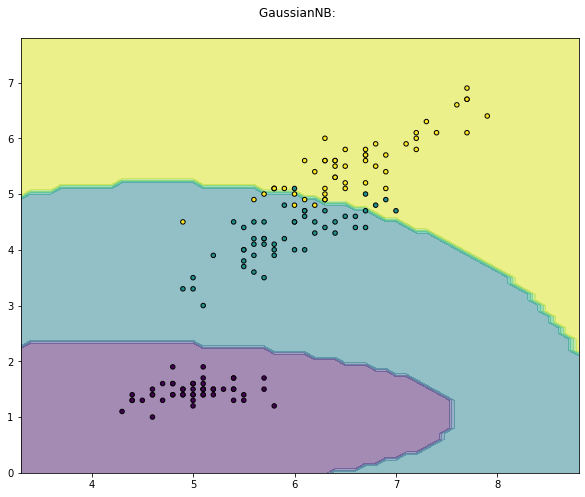

In [31]:
#Import Library of Gaussian Naive Bayes model
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets 
model.fit(X,y)



x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

clf=model

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    
plt.title("GaussianNB: \n")
plt.show()